<a href="https://colab.research.google.com/github/yunhui666/Kaggle_House_Prediction_MLProject/blob/main/Step5_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

After cleaning the dataset, the next step is to engineer features that can help our predictive models. 

This is not an exhaustive list of all types of feature engineering. There are  limitless possibilities for this step, and it's a skill that will naturally improve as you gain more experience and domain expertise. 

In [ ]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.options.mode.chained_assignment = None  # default='warn'

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

Next, let's import the **cleaned** dataset that we created in the previous module.

In [ ]:
# Load cleaned dataset
df = pd.read_csv('data/cleaned_input.csv')

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000.0


## 1. Start with domain knowledge

You can often engineer informative features by tapping into your (or others') expertise about the domain.

Create an indicator variable to flag properties with large lot frontage and large acreage and name it <code style="color:steelblue">'big_house'</code>.

In [ ]:
# Create indicator variable for properties with big garage, living ares and 5 bedrooms
df['big_house'] = ((df.TotRmsAbvGrd >= 5) & (df.GarageArea >= 500) & (df.GrLivArea >= 3000)).astype(int)

In [ ]:
df.big_house.mean()

0.0068634179821551134

Next, let's engineer an indicator feature for the housing market recession.


### Indicator Variable based on date

**Create a new feature called <code style="color:steelblue">'during_recession'</code> to indicate if a transaction falls between 2009 and 2013.**
1. Create a boolean mask to check if <code style="color:steelblue">tx_year >= 2009</code>
2. Create a boolean mask to check if <code style="color:steelblue">tx_year <= 2013</code>
3. Combine the two masks with an <code style="color:steelblue">&</code> operator
4. Convert the resulting series to type <code style="color:steelblue">int</code> to map from <code 

In [ ]:
# Create indicator feature for transactions between 2009 and 2013, inclusive
df['built_during_recession'] = ((df.YearBuilt >= 2009) & (df.YearBuilt <= 2013)).astype(int)

In [ ]:
# Create indicator feature for transactions between 2009 and 2013, inclusive
df['sold_during_recession'] = df.YrSold.between(2009, 2013).astype(int)

**What proportion of transactions in our dataset were during the recession?**

In [ ]:
# Print percent of transactions where built_during_recession == 1
df.built_during_recession.mean()

0.009265614275909403

In [ ]:
# Print percent of transactions where sold_during_recession == 1
df.sold_during_recession.mean()

0.33768016472203155

In [ ]:
df.groupby('sold_during_recession')['SalePrice'].mean()

sold_during_recession
0    180432.205508
1    177098.540117
Name: SalePrice, dtype: float64

In the case where we're checking to see if a value falls between two numbers, there's a shortcut:

<pre style="color:steelblue">df.YearBuilt<strong>.between(2009, 2013)</strong>.astype(int)</pre>

This creates an indicator feature that should be equivalent to the one you created earlier from combining two boolean masks.


## 2. Create interaction features



In [ ]:
# Create a property age feature
df['property_age'] = df.YrSold - df.YearBuilt

In [ ]:
# Min property age
# Should not be less than 0
df.property_age.min()

-1

In [ ]:
df.loc[df.property_age <= 0,'property_age'] = 0

In [ ]:
# Max property age
df.property_age.min()

0

In [ ]:
# Average property age
df.property_age.mean()

36.530199039121484

#### See the % of 'property_age'greater than 50.

In [ ]:
# Number of observations with 'property_age' > 50
sum(df.property_age > 50)/len(df)

0.303363074811256

In [ ]:
# Create a property age feature
df['property_remodel_age'] = df.YrSold - df.YearRemodAdd

In [ ]:
# Min property remodel age
# Should not be less than 0
df.property_remodel_age.min()

-2

In [ ]:
df.loc[df.property_remodel_age <= 0,'property_remodel_age'] = 0

In [ ]:
# Average property remodel age
df.property_remodel_age.mean()

23.558682223747425

## 3. Group sparse classes


<AxesSubplot:xlabel='count', ylabel='RoofMatl'>

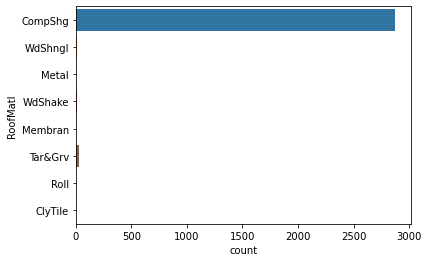

In [ ]:
# Bar plot for RoofMatl
sns.countplot(y='RoofMatl', data=df)

In [ ]:
# print the values of RoofMatl
class_counts = df.groupby('RoofMatl').size()
print(class_counts)

RoofMatl
ClyTile       1
CompShg    2872
Membran       1
Metal         1
Roll          1
Tar&Grv      23
WdShake       9
WdShngl       6
dtype: int64


In [ ]:
# Group small groups together. Label all of them as 'Other'.
df.RoofMatl.replace(['ClyTile', 'Membran', 'Metal','Roll','Tar&Grv','WdShake','WdShngl'], 'Other', inplace=True)

<AxesSubplot:xlabel='count', ylabel='RoofMatl'>

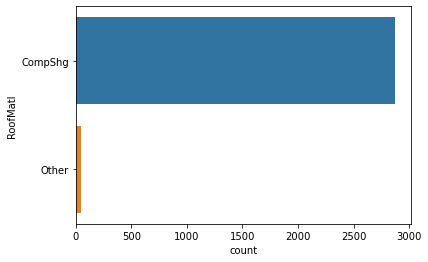

In [ ]:
# Bar plot for RoofMatl
sns.countplot(y='RoofMatl', data=df)

In [ ]:
# Overfitting -> The performance gap between sample and out-of-sample test. 
# Underfitting -> avg

#### It can reduce overfitting problem when the sample set for a specific class is super small.

## 4. Encode dummy variables

Python machine learning algorithms cannot handle categorical features directly. 
Create a new dataframe with dummy variables for for our categorical features.

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,big_house,built_during_recession,sold_during_recession,property_age,property_remodel_age
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500.0,0,0,0,5,5
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500.0,0,0,0,31,31
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500.0,0,0,0,7,6
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000.0,0,0,0,91,36
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000.0,0,0,0,8,8


In [ ]:
df['BldgType'].unique()

array(['1Fam', '2fmCon', 'Duplex', 'TownHouse'], dtype=object)

In [ ]:
# Create new dataframe with dummy features
df = pd.get_dummies(df, columns = df.select_dtypes(include=['object']).columns)

Display the first 5 rows of your dataframe to see these new features.

In [ ]:
df[['BldgType_1Fam','BldgType_2fmCon','BldgType_Duplex','BldgType_TownHouse']].tail(100)

,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_TownHouse
2814,1,0,0,0
2815,1,0,0,0
2816,1,0,0,0
2817,1,0,0,0
2818,1,0,0,0
...,...,...,...,...
2909,0,0,0,1
2910,0,0,0,1
2911,1,0,0,0
2912,1,0,0,0


In [ ]:
df[['RoofMatl_CompShg','RoofMatl_Other']].sum()

RoofMatl_CompShg    2872
RoofMatl_Other        42
dtype: int64

## 5. Remove unused or redundant features

Finally, let's remove unused for redundant features from our dataset.
Drop <code style="color:steelblue">'Id','YearBuilt'</code> and <code style="color:steelblue">'YearRemodAdd'</code> from your dataset.

In [ ]:
# Drop 'tx_year' and 'year_built' from the dataset
df = df.drop(['YearRemodAdd', 'YearBuilt'], axis=1)

Save the analytical base table.

In [ ]:
# Save analytical base table
df.to_csv('data/clean_inputwithfeatures.csv', index=None)

In [ ]:
df.corr()[abs(df.corr()['SalePrice']) > 0.30]['SalePrice']

LotFrontage              0.311633
OverallQual              0.799377
MasVnrArea               0.446578
BsmtFinSF1               0.368128
TotalBsmtSF              0.606577
1stFlrSF                 0.597372
GrLivArea                0.689995
FullBath                 0.555265
TotRmsAbvGrd             0.523029
Fireplaces               0.466886
GarageYrBlt              0.485846
GarageCars               0.652636
GarageArea               0.632302
WoodDeckSF               0.329077
OpenPorchSF              0.326313
SalePrice                1.000000
property_age            -0.540817
property_remodel_age    -0.529371
Neighborhood_NridgHt     0.406891
Exterior1st_VinylSd      0.327944
Exterior2nd_VinylSd      0.329080
MasVnrType_None         -0.385974
MasVnrType_Stone         0.336341
ExterQual_Ex             0.429703
ExterQual_Gd             0.482024
ExterQual_TA            -0.604533
Foundation_CBlock       -0.348826
Foundation_PConc         0.509581
BsmtQual_Ex              0.528569
BsmtQual_TA   

In [ ]:
# Feature Selection
# Method 1
# 1. Build a linear regression with all features
# 2. Signifance Tests
# 3. Drop 1 insignificant feature
# 4. Re-run regression and check r square
# Repete 3 and 4 until 

# Method 2
# Correlation with salesprice
# e.g. abs(corr(feature, salesprice)) >= 0.3

# Method 3 (We will use.)
# ML Model-based Feature Selection
# Tree Methods: Random Forest/ XGBOOST
# LASSO/ RIDGE 

# Method 4
# Deep learning models no need for feature selection. 
